<a href="https://colab.research.google.com/github/arindamdeyofficial/vertebraeSurgeryRiskFactor/blob/main/Group307_kyphosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group307_kyphosis

1. Name - Arindam Dey
2. Group - 307
Group Members - 
ARINDAM DEY - 2020fc04251@wilp.bits-pilani.ac.in
KAUSHIK DUBEY - 2020fc04245@wilp.bits-pilani.ac.in
MOHAMMAD ATTAULLAH - 2020FC04274@wilp.bits-pilani.ac.in

3. Dataset Name - kyphosis.csv
https://github.com/arindamdeyofficial/vertebraeSurgeryRiskFactor/blob/main/kyphosis.csv

RAW-
https://raw.githubusercontent.com/arindamdeyofficial/vertebraeSurgeryRiskFactor/7e5ba322ac93a5636528e286894521d35f7d4995/kyphosis.csv


1.	Import Libraries/Dataset

b.	Import the required libraries

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/arindamdeyofficial/vertebraeSurgeryRiskFactor/7e5ba322ac93a5636528e286894521d35f7d4995/kyphosis.csv')

2.	Data Visualization and Exploration



a.	Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

2.	Data Visualization and Exploration


b.	Print the description and shape of the dataset.

In [6]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [7]:
df.shape

(81, 4)

2.	Data Visualization and Exploration


c.	Provide appropriate visualization to get an insight about the dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

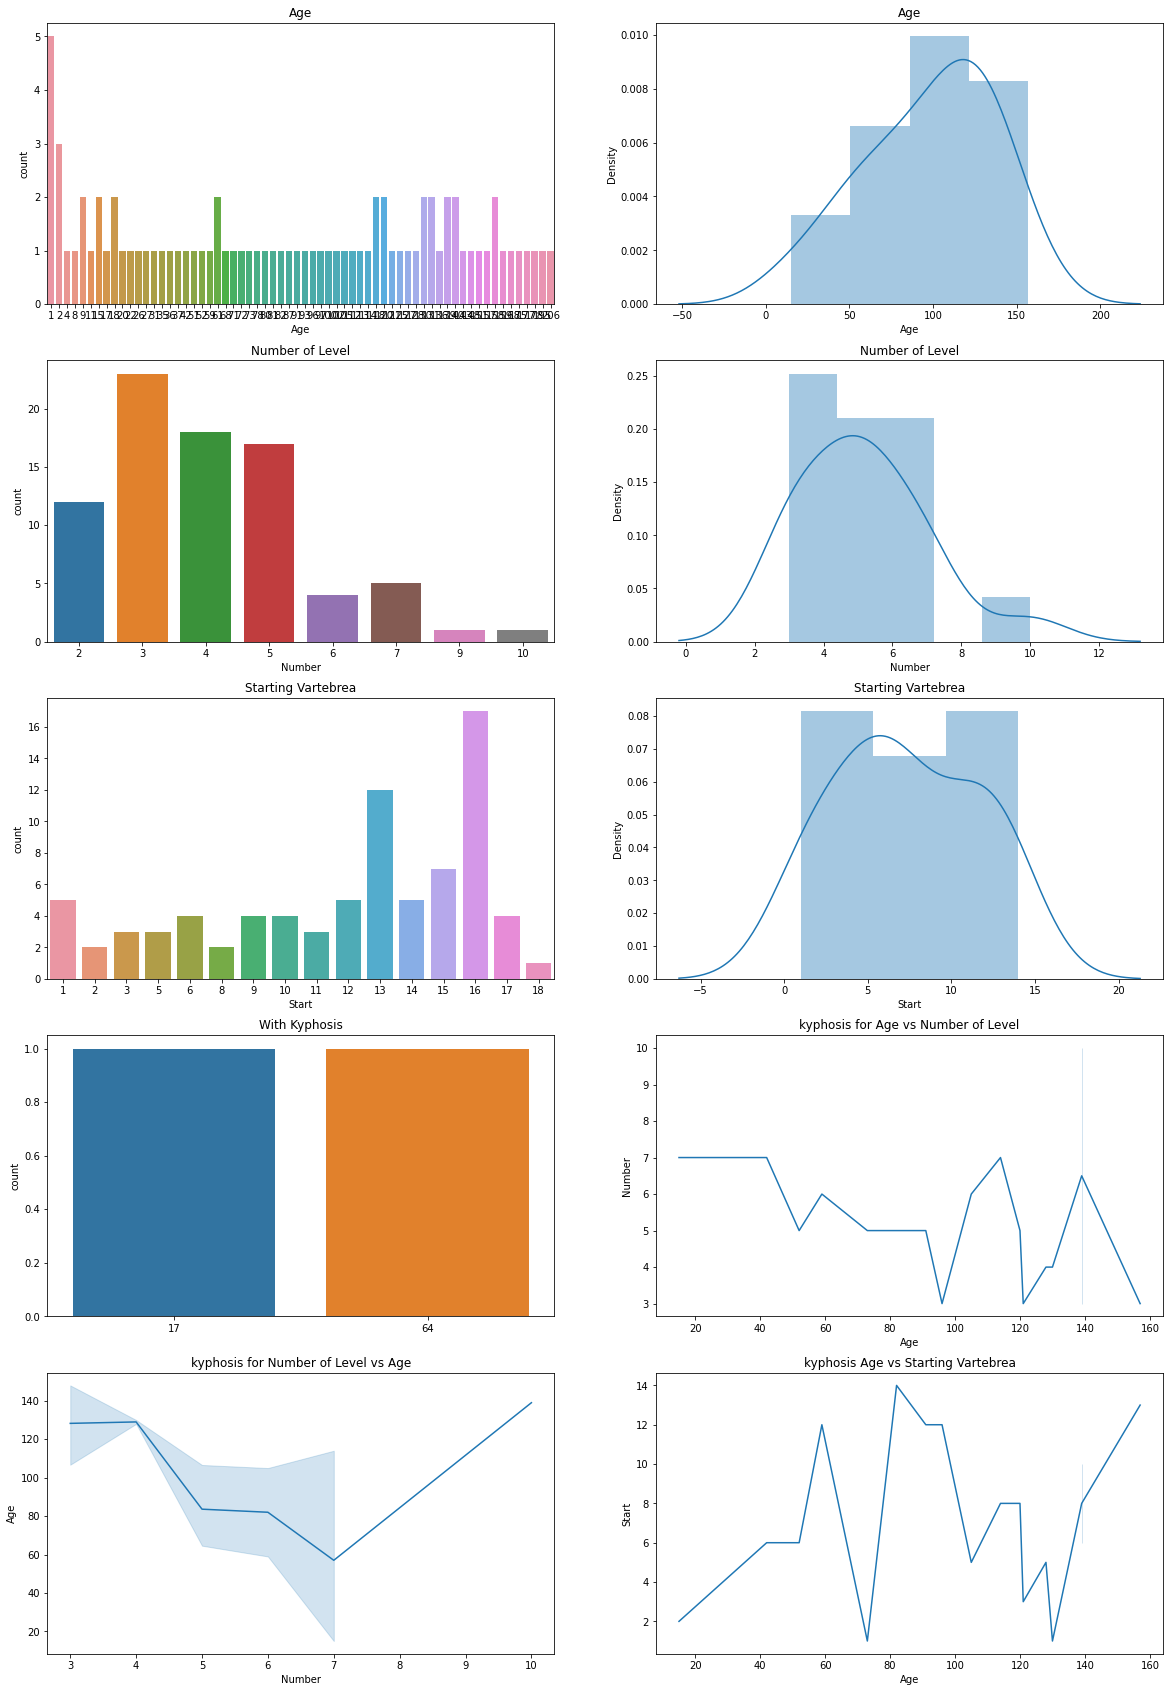

In [8]:
#Number === number of levels involved
#Start === starting vertebrae level of the surgery

n_rows=5
n_cols=2
width=20
height=30

fig,ax=plt.subplots(n_rows,n_cols,sharex=False,sharey=False,figsize=(width,height))
#Data normalisation view
wk = df[df["Kyphosis"]=="present"]

#Age
g = sns.countplot(df["Age"], ax=ax[0,0])
ax[0,0].set_title("Age")

g = sns.distplot(wk["Age"], ax=ax[0,1])
ax[0,1].set_title("Age")

#Number
g = sns.countplot(df["Number"], ax=ax[1,0])
ax[1,0].set_title("Number of Level")

g = sns.distplot(wk["Number"], ax=ax[1,1])
ax[1,1].set_title("Number of Level")

#Start
g = sns.countplot(df["Start"], ax=ax[2,0])
ax[2,0].set_title("Starting Vartebrea")

g = sns.distplot(wk["Start"], ax=ax[2,1])
ax[2,1].set_title("Starting Vartebrea")

#count kyphosis
l = len(df[df["Kyphosis"]=="present"])
g = sns.countplot([l,len(df)-l], ax=ax[3,0])
ax[3,0].set_title("With Kyphosis")

#Count kyphosis for Age vs Number of Level
#Having kyphosis Age vs Number Lineplot Age in X axis
wk = df[df["Kyphosis"]=="present"]
g = sns.lineplot(data=wk, x="Age", y="Number", ax=ax[3,1])
ax[3,1].set_title("kyphosis for Age vs Number of Level")

#Having kyphosis Number vs Age Countplot Number in X axis
g = sns.lineplot(data=wk, x="Number", y="Age", ax=ax[4,0])
ax[4,0].set_title("kyphosis for Number of Level vs Age")

#Having kyphosis Age vs Starting Vartebrea
g = sns.lineplot(data=wk, x="Age", y="Start",  ax=ax[4,1])
ax[4,1].set_title("kyphosis Age vs Starting Vartebrea")

plt.show()

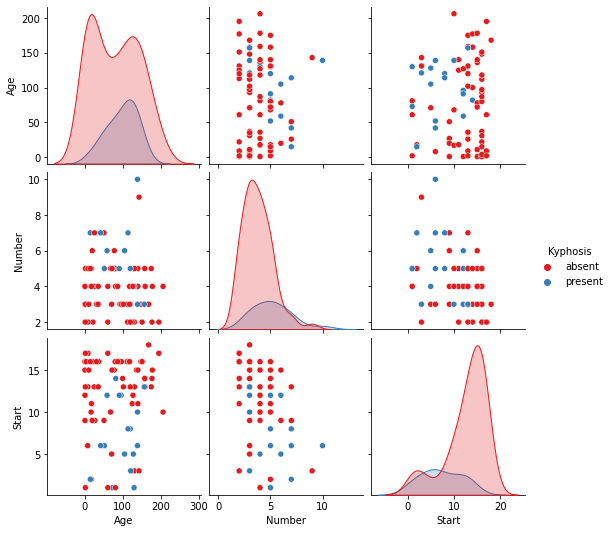

In [9]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

BiVariate analysis

In [10]:
def bi_variate(df, col1, col2):
    cross_name=pd.crosstab(df[col1], df[col2], normalize='index')
    cross_name.plot.bar()
    plt.xlabel('{}'.format(col1))
    plt.ylabel('{}'.format(col2))
    plt.xticks(rotation=0)
    plt.figure(figsize=(16,12))
    plt.show()
    return cross_name*100

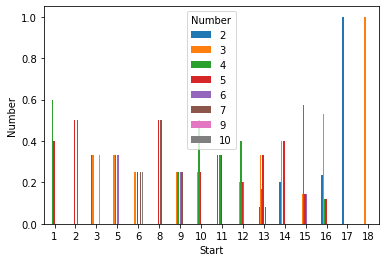

<Figure size 1152x864 with 0 Axes>

Number,2,3,4,5,6,7,9,10
Start,,,,,,,,
1,0.000000,0.000000,60.000000,40.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,50.000000,0.000000,50.000000,0.000000,0.0
3,33.333333,33.333333,0.000000,0.000000,0.000000,0.000000,33.333333,0.0
5,0.000000,33.333333,33.333333,0.000000,33.333333,0.000000,0.000000,0.0
6,0.000000,25.000000,0.000000,25.000000,0.000000,25.000000,0.000000,25.0
8,0.000000,0.000000,0.000000,50.000000,0.000000,50.000000,0.000000,0.0
9,0.000000,25.000000,25.000000,0.000000,25.000000,25.000000,0.000000,0.0
10,0.000000,25.000000,50.000000,25.000000,0.000000,0.000000,0.000000,0.0
11,33.333333,0.000000,33.333333,33.333333,0.000000,0.000000,0.000000,0.0


In [11]:
bi_variate(df, 'Start', 'Number')

d.	Try exploring the data and see what insights can be drawn from the dataset.


Exploratory data analysis

3.	Data Pre-processing and cleaning

a.	Do the appropriate preprocessing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Apply appropriate feature engineering techniques for them.

Now First check should be any Null is present or not

In [12]:
df.isna().any()

Kyphosis    False
Age         False
Number      False
Start       False
dtype: bool

In [13]:
df.isna().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

Now there are no Null values present


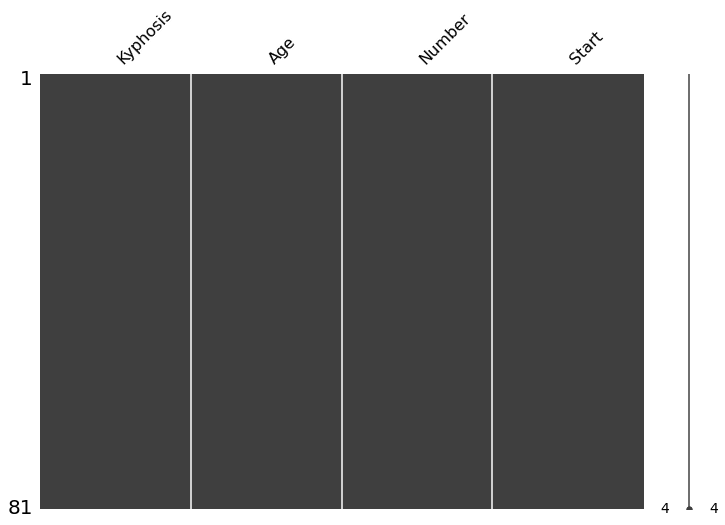

In [14]:
!pip install missingno
import missingno
missingno.matrix(df,figsize=(12,8))

So there are no missing numbers also

Next Step: Outlier Identificayion and removal

Box plot use the Inter Quantile Range(IQR) method. This is easier so will be using

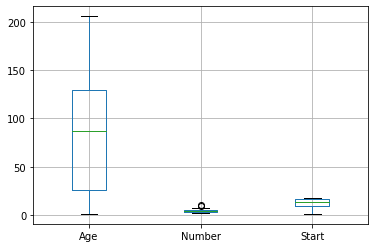

In [16]:
df.boxplot()

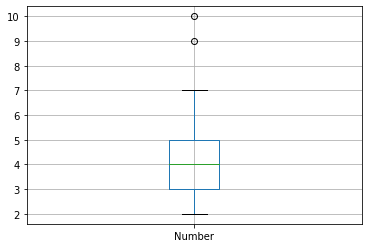

In [17]:
df.boxplot(column=['Number'])

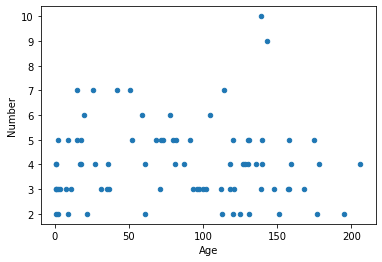

In [18]:
df.plot.scatter('Age', 'Number')

Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured
Through thi method also we can identify Outlier

In [19]:
mean = np.mean(df["Number"]) 
mean

4.049382716049383

In [20]:
std = np.std(df["Number"]) 
std

1.6093955200472556

In [21]:
threshold = 2
outlierCombo = []
outlier = [] 
zScore = [] 
for i in df["Number"]: 
    z = (i-mean)/std 
    if z > threshold: 
      outlierCombo.append([i,z])
      outlier.append(i)
      zScore.append(z)
outlierCombo

[[9, 3.076072489505411], [10, 3.697423790378075]]

In [22]:
df[df["Number"]>=9]

,Kyphosis,Age,Number,Start
42,absent,143,9,3
52,present,139,10,6


This 2 are really unrealistic Age people live according to age also and as per scatter plot and ZScore. But data is skewed toward 100++ years of age and data quantity also less so prefferable not drop but replace in 3 sigma method the 2 outliers.

In [64]:
leftVal = mean - 3*std
rightVal = mean + 3*std
print(mean, std, leftVal,rightVal)
outlL = df[df["Number"]<leftVal]
outlR = df[df["Number"]> rightVal]
print(outlL["Number"].count(), outlR["Number"].count())
print("threshold value count: ", df[df["Number"] == rightVal]["Number"].count())
print(outlR)

4.049382716049383 1.6093955200472556 -0.7788038440923835 8.87756927619115
0 2
threshold value count:  0
   Kyphosis  Age  Number  Start
42   absent  143       9      3
52  present  139      10      6


In [65]:
df.loc[df["Number"] > rightVal, "Number"] = rightVal

In [66]:
df[df["Number"] > rightVal]

,Kyphosis,Age,Number,Start


In [67]:
print("threshold value count: ", df[df["Number"] == rightVal]["Number"].count())

threshold value count:  2


In [68]:
index_names = df.loc[df["Number"]>=9].index
index_names

Int64Index([], dtype='int64')

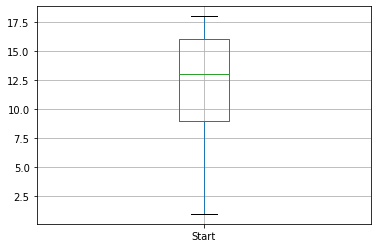

In [69]:
df.boxplot(column=['Start'])

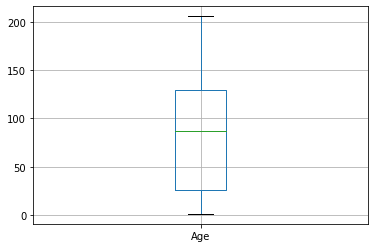

In [39]:
df.boxplot(column=['Age'])

Now we need to see Group by Age how other data is behaving

And population distribution distributes values in ranges according to data density. It is needed as Age data is right skewed

In [70]:
ageSeries = df.copy(deep=True)
ageSeries["AgeRanges"] = pd.qcut(df["Age"], 10)
ageSeries

,Kyphosis,Age,Number,Start,AgeRanges
0,absent,71,3.0,5,"(68.0, 87.0]"
1,absent,158,3.0,14,"(139.0, 158.0]"
2,present,128,4.0,5,"(125.0, 139.0]"
3,absent,2,5.0,1,"(0.999, 4.0]"
4,absent,1,4.0,15,"(0.999, 4.0]"
...,...,...,...,...,...
76,present,157,3.0,13,"(139.0, 158.0]"
77,absent,26,7.0,13,"(18.0, 36.0]"
78,absent,120,2.0,13,"(112.0, 125.0]"
79,present,42,7.0,6,"(36.0, 68.0]"


In [71]:
age = df["Age"]
age.max()

206

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


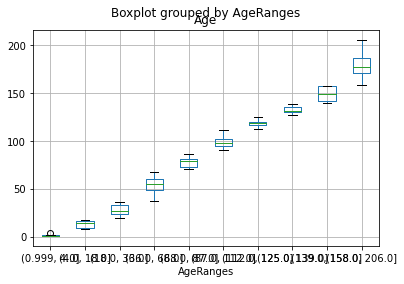

In [72]:
ageSeries.boxplot(column=['Age'], by="AgeRanges")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


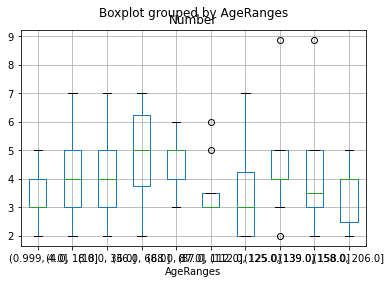

In [53]:
ageSeries.boxplot(column=['Number'], by="AgeRanges")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


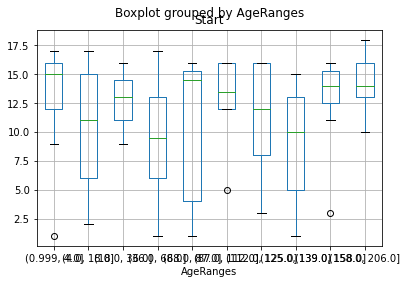

In [54]:
ageSeries.boxplot(column=['Start'], by="AgeRanges")

b.	Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset.

Replace categorical Column with Numeric value

Column segregartion

In [73]:
df.head(10)
#Encoding (categorical to Numerical)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#target column
target_col=['Kyphosis']

#categorical cols
categorical_cols=df.nunique()[df.nunique() < 5].keys().tolist()
categorical_cols=[x for x in categorical_cols if x not in target_col]
print("categorical columns: {}".format(categorical_cols))

#numerical cols
cont_cols=[x for x in df.columns if x not in categorical_cols+target_col]
print("Numerical columns: {}".format(cont_cols))

#binary cols
bin_cols=df.nunique()[df.nunique() == 2].keys().tolist()
print("Binary columns: {}".format(bin_cols))

#multi cols(more than 2 values)
mul_cols=[x for x in categorical_cols if x not in bin_cols]
print("Multi valued columns: {}".format(mul_cols))

categorical columns: []
Numerical columns: ['Age', 'Number', 'Start']
Binary columns: ['Kyphosis']
Multi valued columns: []


In [74]:
#Label Encoding for Binary cols
le=LabelEncoder()
for i in bin_cols:
    df[i]=le.fit_transform(df[i])

#Duplicating cols for multi-value cols
#df=pd.get_dummies(data=df,columns=mul_cols)
df.head(10)

,Kyphosis,Age,Number,Start
0,0,71,3.0,5
1,0,158,3.0,14
2,1,128,4.0,5
3,0,2,5.0,1
4,0,1,4.0,15
5,0,1,2.0,16
6,0,61,2.0,17
7,0,37,3.0,16
8,0,113,2.0,16
9,1,59,6.0,12


3.	Data Pre-processing and cleaning

c.	Do the correlational analysis on the dataset. Provide a visualization for the same.

Feature Selection

We can do by corelation. mostly continuous data as input and categorical data as output. SO we can use below methods.
1. ANOVA correlation coefficient (linear)
2. Kendall’s rank coefficient (nonlinear)

kendall

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

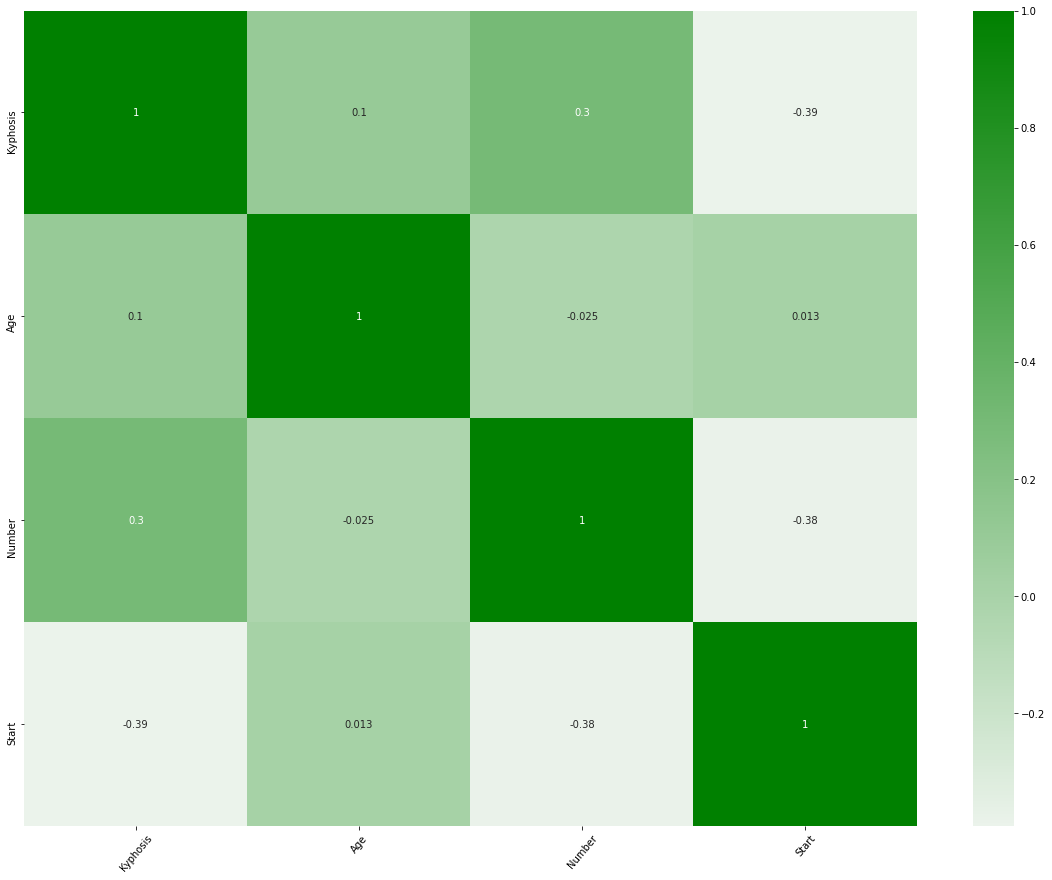

In [75]:
#Co-relation 
#correlation analysis shows us how to determine both the nature and strength of relationship between two variables
#correaltion lies between -1 to 1 (0: No corelation; -1: perfect negative correlation; +1: positive core)
correlation=df.corr(method='kendall')
correlation

#plotting correlation Matrix
plt.figure(figsize=(20,15))
cm = sns.light_palette("green", as_cmap=True)
sns.heatmap(correlation, xticklabels=correlation.columns.values, yticklabels=correlation.columns.values, cmap=cm, annot=True)
plt.xticks(rotation=50)

Corelation between coloumns are not between -1 to + 1 i.e. the best but not greater than 0.5 also and between kyphosis as target and other column is generally greater. so we are good.

 ANOVA F measure

In [76]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['Age'], df['Number'], df['Start'])
print(fvalue, pvalue)

138.10440440436454 1.2198309671987674e-40


p value is e to the power 40 i.e. very small. So null hypothesis rejected. Variance of these columns are not same. So they are less corelated. We can take all 3 to build model.

Generalized Linear Model Table will help for linear regression and predict drop column. It is needed as between target i.e. kyphosis and one of the X i.e column "Start" corelation is not so good. And same between column "Start" and "Number" .

Generalized Linear Models (GLM) estimate regression models for outcomes following exponential distributions. In addition to the Gaussian (i.e. normal) distribution, these include Poisson, binomial, and gamma distributions. Each serves a different purpose, and depending on distribution and link function choice, can be used either for prediction or classification.

In [77]:
from google.colab import files
df.to_csv(r"GlmData.csv", sep=',', index=False)
files.download('GlmData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [104]:
!pip install h2o
import h2o
h2o.init()
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
glm = h2o.import_file("https://raw.githubusercontent.com/arindamdeyofficial/vertebraeSurgeryRiskFactor/main/GlmData.csv")
print(glm.as_data_frame())
glm["Kyphosis"] = glm["Age"].asfactor()
glm["Age"] = glm["Age"].asfactor()
glm["Number"] = glm["Age"].asfactor()
glm["Start"] = glm["Age"].asfactor()
predictors  = ["Age", "Number", "Start"]
response_col = "Kyphosis"

glm_model = H2OGeneralizedLinearEstimator(family= "AUTO")
glm_model.train(predictors, response_col, training_frame= glm)

# Coefficients that can be applied to the non-standardized data.
print(glm_model.coef())

# Coefficients fitted on the standardized data (requires standardize = True, which is on by default)
print(glm_model.coef_norm())

# Print the Coefficients table
print(glm_model._model_json['output']['coefficients_table'])
print(glm_model._model_json)

# Print the Standard error
#print(glm_model._model_json['output']['coefficients_table']['std_error'])

# Print the p values
#print(glm_model._model_json['output']['coefficients_table']['p_value'])

# Print the z values
#print(glm_model._model_json['output']['coefficients_table']['z_value'])

# Retrieve a graphical plot of the standardized coefficient magnitudes
#glm_model.std_coef_plot()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,33 mins 21 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.6
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_unknownUser_6ka0bt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.169 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
    Kyphosis  Age  Number  Start
0          0   71     3.0      5
1          0  158     3.0     14
2          1  128     4.0      5
3          0    2     5.0      1
4          0    1     4.0     15
..       ...  ...     ...    ...
76         1  157     3.0     13
77         0   26     7.0     13
78         0  120     2.0     13
79         1   42     7.0      6
80         0   36     4.0     13

[81 rows x 4 columns]
glm Model Build progress: |███████████████████████████████████████████████| 100%
{'coefs_class_1': {'Intercept': -3.6545389744338364, 'Age.1': 1.6390739405780042, 'Age.2': 0.0, 'Age.4': 0.0, 'Age.8': 0.0, 'Age.9': 0.0, 'Age.11': 0.0, 'Age.15': 0.0, 'Age.17': 0.0, 'Age.18': 0.0, 'Age.20': 0.0, 'Age.22': 0.0, 'Age.26': 0.0, 'Age.27': 0.0, 'Age.31': 0.0, 'Age.35': 0.0, 'Age.36': 0.0, 'Age.37': 0.0, 'Age.42': 0.0, 'Age.51': 0.0, 'Age.52': 0.0, 'Age.59': 0.0, 'Age.61': 0.0, 'Age.68': 0.0, 'Age.71': 0

,names,coefs_class_0,coefs_class_1,coefs_class_2,coefs_class_3,coefs_class_4,coefs_class_5,coefs_class_6,coefs_class_7,coefs_class_8,coefs_class_9,coefs_class_10,coefs_class_11,coefs_class_12,coefs_class_13,coefs_class_14,coefs_class_15,coefs_class_16,coefs_class_17,coefs_class_18,coefs_class_19,coefs_class_20,coefs_class_21,coefs_class_22,coefs_class_23,coefs_class_24,coefs_class_25,coefs_class_26,coefs_class_27,coefs_class_28,coefs_class_29,coefs_class_30,coefs_class_31,coefs_class_32,coefs_class_33,coefs_class_34,coefs_class_35,coefs_class_36,coefs_class_37,coefs_class_38,...,std_coefs_class_24,std_coefs_class_25,std_coefs_class_26,std_coefs_class_27,std_coefs_class_28,std_coefs_class_29,std_coefs_class_30,std_coefs_class_31,std_coefs_class_32,std_coefs_class_33,std_coefs_class_34,std_coefs_class_35,std_coefs_class_36,std_coefs_class_37,std_coefs_class_38,std_coefs_class_39,std_coefs_class_40,std_coefs_class_41,std_coefs_class_42,std_coefs_class_43,std_coefs_class_44,std_coefs_class_45,std_coefs_class_46,std_coefs_class_47,std_coefs_class_48,std_coefs_class_49,std_coefs_class_50,std_coefs_class_51,std_coefs_class_52,std_coefs_class_53,std_coefs_class_54,std_coefs_class_55,std_coefs_class_56,std_coefs_class_57,std_coefs_class_58,std_coefs_class_59,std_coefs_class_60,std_coefs_class_61,std_coefs_class_62,std_coefs_class_63
0,Intercept,-3.654539,-3.731125,-4.037075,-4.037140,-3.807430,-4.037260,-3.807528,-4.036455,-3.807548,-4.037341,-4.037349,-4.037356,-4.037362,-4.037366,-4.037369,-4.037370,-4.037369,-4.037368,-4.037364,-4.037359,-4.037353,-3.80755,-4.037323,-4.037312,-4.037299,-4.037284,-4.037268,-4.03725,-4.037231,-4.03721,-4.037188,-4.037223,-4.037258,-4.037291,-4.037324,-4.037355,-4.037385,-4.037413,-4.037441,...,-4.037299,-4.037284,-4.037268,-4.03725,-4.037231,-4.03721,-4.037188,-4.037223,-4.037258,-4.037291,-4.037324,-4.037355,-4.037385,-4.037413,-4.037441,-4.037467,-4.037492,-3.807734,-3.807753,-4.037553,-4.037572,-4.03759,-4.037609,-3.807863,-3.807814,-4.040438,-3.807766,-3.807717,-4.037473,-4.037449,-4.037426,-4.037405,-3.80759,-4.037356,-4.037345,-4.037336,-4.037332,-4.037333,-4.037338,-4.037349
1,Age.1,1.639074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Age.2,0.000000,1.453385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Age.4,0.000000,0.000000,0.812450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.


See the whole table with table.as_data_frame()


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,multinomial,multinomial,"Elastic Net (alpha = 0.5, lambda = 0.01158 )",12352,192,6,py_92_sid_bb73



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_classification_error,training_auc,training_pr_auc
0,,2021-08-26 16:58:34,0.000 sec,0,329.358117,4.066150,,,,,,
1,,2021-08-26 16:58:34,0.248 sec,1,104.808506,3.258623,,,,,,
2,,2021-08-26 16:58:34,0.414 sec,2,128.745579,3.084694,,,,,,
3,,2021-08-26 16:58:34,0.570 sec,3,122.628671,2.979726,,,,,,
4,,2021-08-26 16:58:34,0.751 sec,4,117.114381,2.960271,,,,,,
5,,2021-08-26 16:58:35,0.923 sec,5,117.729626,2.959910,,,,,,
6,,2021-08-26 16:58:35,1.072 sec,6,117.673907,2.959906,0.738667,1.45276,0.998595,0,NaN,NaN



Node Information: 


,,node,h2o,healthy,last_ping,num_cpus,sys_load,mem_value_size,free_mem,pojo_mem,swap_mem,free_disc,max_disc,pid,num_keys,tcps_active,open_fds,rpcs_active,nthreads,is_leader,total_mem,max_mem,java_version,jvm_launch_parameters,os_version,machine_physical_mem,machine_locale
0,,0,127.0.0.1:54321,true,1629997114214,2,0.42,3034823.0,3.402740e+09,0.0,0.0,7.523009e+10,1.156579e+11,445,248, ,25, ,2,true,274726912.0,3.405775e+09,Java 11.0.11 (from Ubuntu),[-ea],Linux 5.4.104+ (amd64),0.0,en_US



Cluster Configuration: 


,,h2o_cluster_uptime,h2o_cluster_timezone,h2o_data_parsing_timezone,h2o_cluster_version,h2o_cluster_version_age,h2o_cluster_name,h2o_cluster_total_nodes,h2o_cluster_free_memory,h2o_cluster_total_cores,h2o_cluster_allowed_cores,h2o_cluster_status,h2o_internal_security,h2o_api_extensions
0,,2002687.0,Etc/UTC,UTC,3.32.1.6,6 days,H2O_from_python_unknownUser_6ka0bt,1,3.402740e+09,2,2,"locked, healthly",false,"Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4"



Input Frames Information: 


,,input_frame,checksum,espc
0,,training_frame,-6.733934e+18,"[0, 81]"
1,,validation_frame,-1.000000e+00,-1



ModelMetricsMultinomialGLM: glm
** Reported on train data. **

MSE: 0.5456295142537627
RMSE: 0.7386673908152185

Coefficients: glm multinomial coefficients


,names,coefs_class_0,coefs_class_1,coefs_class_2,coefs_class_3,coefs_class_4,coefs_class_5,coefs_class_6,coefs_class_7,coefs_class_8,coefs_class_9,coefs_class_10,coefs_class_11,coefs_class_12,coefs_class_13,coefs_class_14,coefs_class_15,coefs_class_16,coefs_class_17,coefs_class_18,coefs_class_19,coefs_class_20,coefs_class_21,coefs_class_22,coefs_class_23,coefs_class_24,coefs_class_25,coefs_class_26,coefs_class_27,coefs_class_28,coefs_class_29,coefs_class_30,coefs_class_31,coefs_class_32,coefs_class_33,coefs_class_34,coefs_class_35,coefs_class_36,coefs_class_37,coefs_class_38,...,std_coefs_class_24,std_coefs_class_25,std_coefs_class_26,std_coefs_class_27,std_coefs_class_28,std_coefs_class_29,std_coefs_class_30,std_coefs_class_31,std_coefs_class_32,std_coefs_class_33,std_coefs_class_34,std_coefs_class_35,std_coefs_class_36,std_coefs_class_37,std_coefs_class_38,std_coefs_class_39,std_coefs_class_40,std_coefs_class_41,std_coefs_class_42,std_coefs_class_43,std_coefs_class_44,std_coefs_class_45,std_coefs_class_46,std_coefs_class_47,std_coefs_class_48,std_coefs_class_49,std_coefs_class_50,std_coefs_class_51,std_coefs_class_52,std_coefs_class_53,std_coefs_class_54,std_coefs_class_55,std_coefs_class_56,std_coefs_class_57,std_coefs_class_58,std_coefs_class_59,std_coefs_class_60,std_coefs_class_61,std_coefs_class_62,std_coefs_class_63
0,Intercept,-3.654539,-3.731125,-4.037075,-4.037140,-3.807430,-4.037260,-3.807528,-4.036455,-3.807548,-4.037341,-4.037349,-4.037356,-4.037362,-4.037366,-4.037369,-4.037370,-4.037369,-4.037368,-4.037364,-4.037359,-4.037353,-3.80755,-4.037323,-4.037312,-4.037299,-4.037284,-4.037268,-4.03725,-4.037231,-4.03721,-4.037188,-4.037223,-4.037258,-4.037291,-4.037324,-4.037355,-4.037385,-4.037413,-4.037441,...,-4.037299,-4.037284,-4.037268,-4.03725,-4.037231,-4.03721,-4.037188,-4.037223,-4.037258,-4.037291,-4.037324,-4.037355,-4.037385,-4.037413,-4.037441,-4.037467,-4.037492,-3.807734,-3.807753,-4.037553,-4.037572,-4.03759,-4.037609,-3.807863,-3.807814,-4.040438,-3.807766,-3.807717,-4.037473,-4.037449,-4.037426,-4.037405,-3.80759,-4.037356,-4.037345,-4.037336,-4.037332,-4.037333,-4.037338,-4.037349
1,Age.1,1.639074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Age.2,0.000000,1.453385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Age.4,0.000000,0.000000,0.812450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.


See the whole table with table.as_data_frame()

Coefficients with class names: glm multinomial coefficients


,names,coefs_class_1,coefs_class_2,coefs_class_4,coefs_class_8,coefs_class_9,coefs_class_11,coefs_class_15,coefs_class_17,coefs_class_18,coefs_class_20,coefs_class_22,coefs_class_26,coefs_class_27,coefs_class_31,coefs_class_35,coefs_class_36,coefs_class_37,coefs_class_42,coefs_class_51,coefs_class_52,coefs_class_59,coefs_class_61,coefs_class_68,coefs_class_71,coefs_class_72,coefs_class_73,coefs_class_78,coefs_class_80,coefs_class_81,coefs_class_82,coefs_class_87,coefs_class_91,coefs_class_93,coefs_class_96,coefs_class_97,coefs_class_100,coefs_class_102,coefs_class_105,coefs_class_112,...,std_coefs_class_72,std_coefs_class_73,std_coefs_class_78,std_coefs_class_80,std_coefs_class_81,std_coefs_class_82,std_coefs_class_87,std_coefs_class_91,std_coefs_class_93,std_coefs_class_96,std_coefs_class_97,std_coefs_class_100,std_coefs_class_102,std_coefs_class_105,std_coefs_class_112,std_coefs_class_113,std_coefs_class_114,std_coefs_class_118,std_coefs_class_120,std_coefs_class_121,std_coefs_class_125,std_coefs_class_127,std_coefs_class_128,std_coefs_class_130,std_coefs_class_131,std_coefs_class_136,std_coefs_class_139,std_coefs_class_140,std_coefs_class_143,std_coefs_class_148,std_coefs_class_151,std_coefs_class_157,std_coefs_class_158,std_coefs_class_159,std_coefs_class_168,std_coefs_class_175,std_coefs_class_177,std_coefs_class_178,std_coefs_class_195,std_coefs_class_206
0,Intercept,-3.654539,-3.731125,-4.037075,-4.037140,-3.807430,-4.037260,-3.807528,-4.036455,-3.807548,-4.037341,-4.037349,-4.037356,-4.037362,-4.037366,-4.037369,-4.037370,-4.037369,-4.037368,-4.037364,-4.037359,-4.037353,-3.80755,-4.037323,-4.037312,-4.037299,-4.037284,-4.037268,-4.03725,-4.037231,-4.03721,-4.037188,-4.037223,-4.037258,-4.037291,-4.037324,-4.037355,-4.037385,-4.037413,-4.037441,...,-4.037299,-4.037284,-4.037268,-4.03725,-4.037231,-4.03721,-4.037188,-4.037223,-4.037258,-4.037291,-4.037324,-4.037355,-4.037385,-4.037413,-4.037441,-4.037467,-4.037492,-3.807734,-3.807753,-4.037553,-4.037572,-4.03759,-4.037609,-3.807863,-3.807814,-4.040438,-3.807766,-3.807717,-4.037473,-4.037449,-4.037426,-4.037405,-3.80759,-4.037356,-4.037345,-4.037336,-4.037332,-4.037333,-4.037338,-4.037349
1,Age.1,1.639074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Age.2,0.000000,1.453385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Age.4,0.000000,0.000000,0.812450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000


See the whole table with table.as_data_frame()

Standardized Coefficient Magnitudes: standardized coefficient magnitudes


,names,coefficients,sign
0,Age.1,1.639074,POS
1,Number.1,1.639074,POS
2,Start.1,1.639074,POS
3,Age.2,1.453385,POS
4,Start.2,1.453385,POS
5,Number.2,1.453385,POS
6,Number.9,1.275413,POS
7,Age.9,1.275413,POS
8,Start.9,1.275413,POS
9,Age.15,1.275409,POS



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Age.1,1.639074,1.000000,0.009330
1,Number.1,1.639074,1.000000,0.009330
2,Start.1,1.639074,1.000000,0.009330
3,Age.2,1.453385,0.886711,0.008273
4,Start.2,1.453385,0.886711,0.008273
5,Number.2,1.453385,0.886711,0.008273
6,Number.9,1.275413,0.778130,0.007260
7,Age.9,1.275413,0.778130,0.007260
8,Start.9,1.275413,0.778130,0.007260
9,Age.15,1.275409,0.778128,0.007260



See the whole table with table.as_data_frame()
{'__meta': {'schema_version': 3, 'schema_name': 'GLMModelV3', 'schema_type': 'GLMModel'}, 'model_id': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GLM_model_python_1629995108072_23', 'type': 'Key<Model>', 'URL': '/3/Models/GLM_model_python_1629995108072_23'}, 'algo': 'glm', 'algo_full_name': 'Generalized Linear Modeling', 'response_column_name': 'Kyphosis', 'data_frame': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_92_sid_bb73', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_92_sid_bb73'}, 'timestamp': 1629997115333, 'have_pojo': True, 'have_mojo': True, 'parameters': [{'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'model_id', 'label': 'model_id', 'help': 'Destination id for this model; auto-generated if not specified.', 'required': False, 'type': 'Key<Model>', 'default_v

4.	Data Preparation

a.	Do the final feature selection and extract them into Column X and the class label into Column into Y.

In [151]:
x=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

4.	Data Preparation

b.	Split the dataset into training and test sets.

In [152]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=101)

Part B

1.	Model Building

a.	Perform Model Development using at least three models, separately. You are free to apply any Machine Learning Models on the dataset. Deep Learning Models are strictly not allowed.

We will try Descision Tree as data is too small and number of column is also less preferrebly. And also try Random forest and Logistics regression as all of them are Classification models.

We have general common classification techniques
1. Logistic Regression
2. Naïve Bayes
3. Stochastic Gradient Descent
4. K-Nearest Neighbours
5. Decision Tree
6. Random Forest
7. Support Vector Machine

1.	Model Building

Logistics Regression

In [127]:
from sklearn.metrics import classification_report,confusion_matrix
def viewConfusionMatrix(y_test, y_pred):
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))

In [126]:
from sklearn.linear_model import LogisticRegression

def logicalRegres(x,y,x_train,y_train,x_test,y_test):
  clf = LogisticRegression(random_state=0).fit(x, y)
  logreg = LogisticRegression()
  logreg.fit(x_train, y_train)
  y_pred = logreg.predict(x_test)
  print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))
  return y_pred

Now logical regression using all column

In [130]:
y_pred = logicalRegres(x,y,x_train,y_train,x_test,y_test)

Accuracy of logistic regression classifier on test set: 0.74


In [131]:
viewConfusionMatrix(y_test, y_pred)

[[19  0]
 [ 7  1]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       1.00      0.12      0.22         8

    accuracy                           0.74        27
   macro avg       0.87      0.56      0.53        27
weighted avg       0.81      0.74      0.66        27



Logical regression not using "Start" column

Need to prepare other sets of x i.e. input as Start corelation is not very good and will compare them in same Logical Regression model. Their accuracy and performance.

In [132]:
x_no_start=df.drop(['Kyphosis', 'Start'],axis=1)

In [133]:
from sklearn.model_selection import train_test_split
x_no_start_train,x_no_start_test,y_no_start_train,y_no_start_test=train_test_split(x_no_start,y,test_size=0.33,random_state=101)

In [135]:
y_no_start_pred = logicalRegres(x_no_start,y,x_no_start_train,y_no_start_train,x_no_start_test,y_no_start_test)

Accuracy of logistic regression classifier on test set: 0.74


In [136]:
viewConfusionMatrix(y_no_start_test, y_no_start_pred)

[[19  0]
 [ 7  1]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       1.00      0.12      0.22         8

    accuracy                           0.74        27
   macro avg       0.87      0.56      0.53        27
weighted avg       0.81      0.74      0.66        27



So no change in accuracy though. SO we are good

DecisionTree

In [137]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
#b.	 Train the model and print the training accuracy and loss values
dtree.fit(x_train,y_train)
#2.	Performance Evaluation
#b. Do the prediction for the test data and display the results for the inference
y_pred=dtree.predict(x_test)
#a. Print the confusion matrix. Provide appropriate analysis for the same.


a.	Print the confusion matrix. Provide appropriate analysis for the same.

In [138]:
viewConfusionMatrix(y_test, y_pred)

[[15  4]
 [ 6  2]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        19
           1       0.33      0.25      0.29         8

    accuracy                           0.63        27
   macro avg       0.52      0.52      0.52        27
weighted avg       0.60      0.63      0.61        27



RandomForest

In [139]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20000)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [140]:
viewConfusionMatrix(y_test, y_pred)

[[19  0]
 [ 6  2]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        19
           1       1.00      0.25      0.40         8

    accuracy                           0.78        27
   macro avg       0.88      0.62      0.63        27
weighted avg       0.83      0.78      0.73        27



data is not very much imbalanced though but we can try SMOTE approach

In [208]:
!pip install imbalanced-learn
import imblearn
print(imblearn.__version__)
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

0.4.3


In [209]:
x=df.drop(['Kyphosis'],axis=1)
y=df['Kyphosis']

In [210]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=101)

Counter({0: 64, 1: 17})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 64, 1: 64})


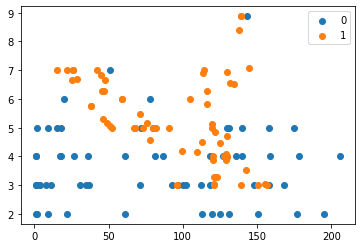

In [211]:
oversample = SMOTE()
counter = Counter(y)
print(counter)
X, y = oversample.fit_resample(x, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [212]:
# define model
model = DecisionTreeClassifier()
# evaluate pipeline
# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: ', scores.mean())

Mean ROC AUC:  0.8059523809523809


Previously Descision tree accuracy was 0.63 it is better